In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
import re
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [70]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ibrahim
[nltk_data]     Yousaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading the dataset

In [71]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Ibrahim Yousaf\OneDrive\Desktop\spam.csv",encoding='latin-1')
# Display the first few rows of the dataset
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [72]:
# Drop the irrelevant columns (Unnamed: 2,Unnamed: 3,Unnamed: 4)
columns_to_drop=["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df.drop(columns=columns_to_drop,inplace=True)
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# Exploring the dataset

In [73]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [74]:
df.info

<bound method DataFrame.info of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [75]:
df.shape

(5572, 2)

In [76]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [77]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [78]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [79]:
# Renaming the columns v1 and v2 to Category and Message respectively
rename_columns={"v1" : "Category", "v2" : "Message"}
df.rename(columns=rename_columns,inplace=True)
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# Data Visualization

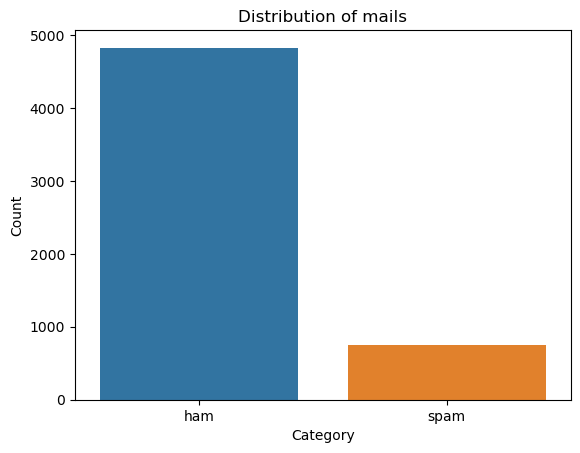

In [80]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of mails')
plt.show()

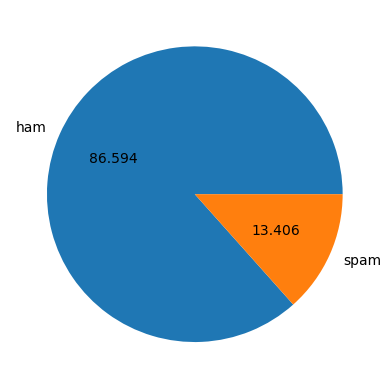

In [81]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.3f')
plt.show()

# Word Cloud for ham messages

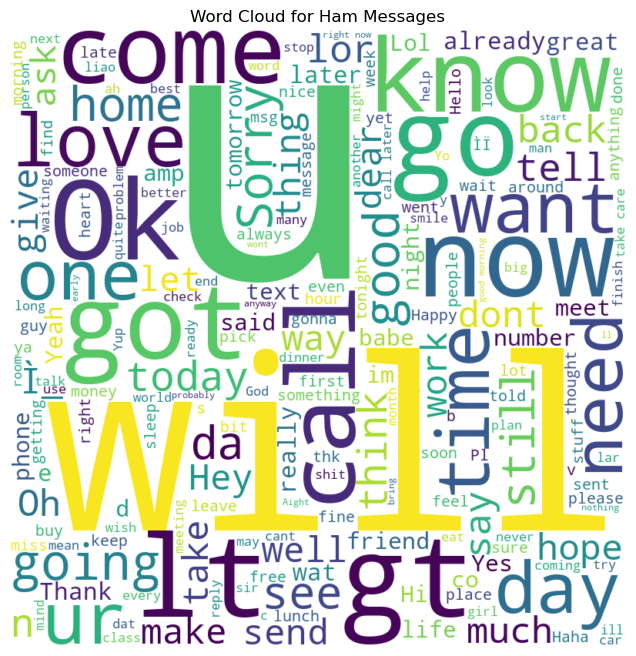

In [82]:
# Filter the DataFrame to select only ham messages
ham_messages = df[df['Category'] == 'ham']['Message']

# Concatenate all ham messages into a single string
all_ham_messages = ' '.join(ham_messages)

# Generate the word cloud using all words in ham messages
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_ham_messages)

# Plot the WordCloud image
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis("off")
plt.show()


# Word Cloud for spam messages

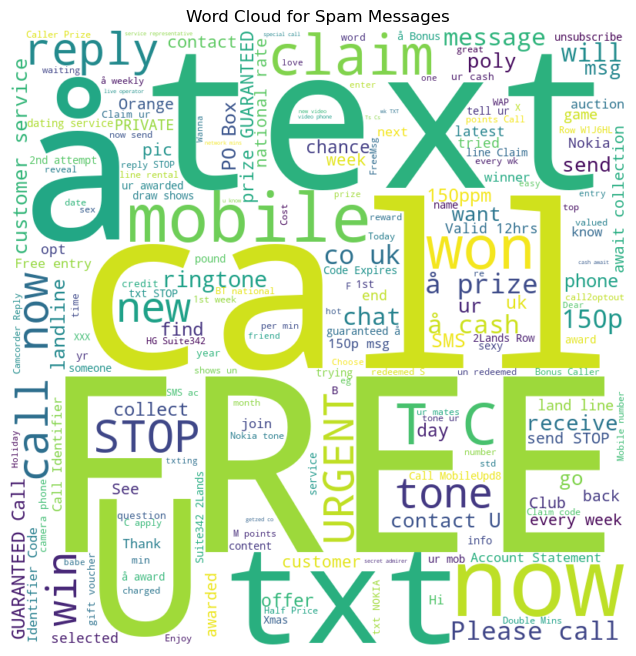

In [83]:
# Filter the DataFrame to select only spam messages
spam_messages = df[df['Category'] == 'spam']['Message']

# Concatenate all spam messages into a single string
all_spam_messages = ' '.join(spam_messages)

# Generate the word cloud using all words in spam messages
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_spam_messages)

# Plot the WordCloud image
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis("off")
plt.show()


# Data Preprocessing

In [84]:
# Label encoding (spam is represented as 0 and ham as 1 respectively)
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [85]:
# The messages are kept in X 
X=df["Message"]

In [86]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

# Preprocess the text data (Messages)

In [87]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()    
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)   
    # Remove hashtags
    text = re.sub(r'#\w+', '', text) 
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [88]:
X = X.apply(preprocess_text)
X

0       go jurong point crazy available bugis great wo...
1                                   ok lar joking wif oni
2       free entry wkly comp win fa cup final tkts st ...
3                       u dun say early hor c already say
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact u å pound prize claim ea...
5568                           ì_ going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [89]:
# The Categories are kept in Y
Y=df["Category"]

In [90]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

# Splitting the data into train and test 

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [92]:
X_train.shape

(4457,)

In [93]:
X_test.shape

(1115,)

In [94]:
Y_train.shape

(4457,)

In [95]:
Y_test.shape

(1115,)

# Feature extraction

## TF-IDF_Vectorizer

In [96]:
# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [97]:
# Convert Y_train and Y_test to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [98]:
X_train

3075    mum hope great day hoping text meets well full...
1787                                  yes sura sun tv lol
1614                sef dey laugh meanwhile darling anjie
4304                                  yo come carlos soon
3266                                   ok come pick engin
                              ...                        
789                            gud mrng dear hav nice day
968                             willing go aptitude class
1667         dad gonna call gets work ask crazy questions
3321    ok darlin supose ok worry much film stuff mate...
1688                           nan sonathaya soladha boss
Name: Message, Length: 4457, dtype: object

In [99]:
print(X_train_tfidf)

  (0, 5)	0.33642172634425704
  (0, 2056)	0.2519053703666926
  (0, 1579)	0.3125706048853935
  (0, 4695)	0.2289109943698405
  (0, 4075)	0.21210199236323898
  (0, 1782)	0.33642172634425704
  (0, 806)	0.3989826132921924
  (0, 1672)	0.4599205632414978
  (0, 1779)	0.22788477025481318
  (0, 2356)	0.304057771164167
  (1, 2099)	0.3790649391787434
  (1, 4351)	0.43733066682471095
  (1, 3891)	0.4752009250541509
  (1, 3916)	0.5632208974523171
  (1, 4930)	0.3493106944265448
  (2, 793)	0.43789684556363356
  (2, 2222)	0.46122610359515265
  (2, 2019)	0.4085054563968759
  (2, 911)	0.42134447357141913
  (2, 3291)	0.5011077336188864
  (3, 3613)	0.4903863168693604
  (3, 426)	0.5927091854194291
  (3, 541)	0.3708680641487708
  (3, 4942)	0.5202633571003087
  (4, 2575)	0.6723310112321104
  :	:
  (4453, 4750)	0.7229350402376244
  (4453, 501)	0.5697055083381121
  (4453, 1642)	0.39089712376255437
  (4454, 1621)	0.41759993940637435
  (4454, 770)	0.37329154505187284
  (4454, 1651)	0.3378079249911877
  (4454, 684)	0

# Model Selection and training

# Logistic Regression

In [100]:
# Create and Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, Y_train)

LogisticRegression()

# Evaluating the model

In [101]:
 #Make predictions on the training data
predict_train_data=model.predict(X_train_tfidf)

In [102]:
#Model Evaluation
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9694862014808167


In [103]:
# Make predictions on the testing data
predict_test_data=model.predict(X_test_tfidf)

In [104]:
#Model Evaluation
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.967713004484305


# Test the model with an example

## Example to demonstrate a valid email

In [105]:
new_mail = ["Congratulations on your recent achievement! Well done."]
new_mail_preprocessed = [preprocess_text(mail) for mail in new_mail]
new_data_features = tfidf_vectorizer.transform(new_mail_preprocessed)
prediction = model.predict(new_data_features)

print(prediction)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


## Example to demonstrate a spam email

In [106]:
new_mail = ["Congratulations! You've won a free trip to Hawaii. Click here to claim your prize."]
new_mail_preprocessed = [preprocess_text(mail) for mail in new_mail]
new_data_features = tfidf_vectorizer.transform(new_mail_preprocessed)
prediction = model.predict(new_data_features)
print(prediction)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

[0]
Spam Mail
